In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
%%time

# Third-party imports
import os.path as op
import pandas as pd
import great_expectations as ge

# Project imports
from ta_lib.core.api import display_as_tabs, initialize_environment

# Initialization
initialize_environment(debug=False, hide_warnings=True)

Wall time: 0 ns


In [97]:
# load datasets
import pandas as pd
import numpy as np
train = pd.read_csv("raw/train.csv")
test = pd.read_csv("raw/test.csv")

In [98]:
# Import the eda API
import ta_lib.eda.api as eda

In [99]:
display_as_tabs([('train', train.shape), ('test', test.shape)])

Tabs
    [0] Str(tuple, name='train')
    [1] Str(tuple, name='test')

In [100]:
sum1 = eda.get_variable_summary(train)
sum2 = eda.get_variable_summary(test)

display_as_tabs([('train', sum1), ('test', sum2)])

Tabs
    [0] DataFrame(name='train', value=               Variable Na...)
    [1] DataFrame(name='test', value=               Variable Na...)

In [101]:
v=train.isna().sum()
v

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Cleaning Dataset

In [102]:
# standard code-template imports
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, get_package_path,
    display_as_tabs, string_cleaning, merge_info, initialize_environment,
    list_datasets, load_dataset, save_dataset
)
import ta_lib.eda.api as eda

In [103]:
#fill the nan values of numerical columns train
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
train['MasVnrArea'] = train.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.mean()))
train['GarageYrBlt'] = train.groupby('Neighborhood')['GarageYrBlt'].transform(lambda x: x.fillna(x.mean()))

In [104]:
#filling categorical data train
train['Alley'] = train['Alley'].transform(lambda x: x.fillna('None'))
train['PoolQC'] = train['PoolQC'].transform(lambda x: x.fillna('None'))
train['Fence'] = train['Fence'].transform(lambda x: x.fillna('None'))
train['MiscFeature'] = train['MiscFeature'].transform(lambda x: x.fillna('None'))
train['FireplaceQu'] = train['FireplaceQu'].transform(lambda x: x.fillna('None'))

In [105]:
train['MasVnrType'] = train.fillna(train['MasVnrType'].value_counts().index[0])
train['BsmtQual'] = train.fillna(train['BsmtQual'].value_counts().index[0])
train['BsmtCond'] = train.fillna(train['BsmtCond'].value_counts().index[0])
train['BsmtExposure'] = train.fillna(train['BsmtExposure'].value_counts().index[0])
train['BsmtFinType1'] = train.fillna(train['BsmtFinType1'].value_counts().index[0])
train['BsmtFinType2'] = train.fillna(train['BsmtFinType2'].value_counts().index[0])
train['Electrical'] = train.fillna(train['Electrical'].value_counts().index[0])
train['GarageType'] = train.fillna(train['GarageType'].value_counts().index[0])
train['GarageFinish'] = train.fillna(train['GarageFinish'].value_counts().index[0])
train['GarageQual'] = train.fillna(train['GarageQual'].value_counts().index[0])
train['GarageCond'] = train.fillna(train['GarageCond'].value_counts().index[0])

In [106]:
#fill the nan values of numerical columns test
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
test['MasVnrArea'] = test.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.mean()))
test['GarageYrBlt'] = test.groupby('Neighborhood')['GarageYrBlt'].transform(lambda x: x.fillna(x.mean()))

In [107]:
#filling categorical data test
test['Alley'] = test['Alley'].transform(lambda x: x.fillna('None'))
test['PoolQC'] = test['PoolQC'].transform(lambda x: x.fillna('None'))
test['Fence'] = test['Fence'].transform(lambda x: x.fillna('None'))
test['MiscFeature'] = test['MiscFeature'].transform(lambda x: x.fillna('None'))
test['FireplaceQu'] = test['FireplaceQu'].transform(lambda x: x.fillna('None'))

In [108]:
test['MasVnrType'] = test.fillna(train['MasVnrType'].value_counts().index[0])
test['BsmtQual'] = test.fillna(train['BsmtQual'].value_counts().index[0])
test['BsmtCond'] = test.fillna(train['BsmtCond'].value_counts().index[0])
test['BsmtExposure'] = test.fillna(train['BsmtExposure'].value_counts().index[0])
test['BsmtFinType1'] = test.fillna(train['BsmtFinType1'].value_counts().index[0])
test['BsmtFinType2'] = test.fillna(train['BsmtFinType2'].value_counts().index[0])
test['Electrical'] = test.fillna(train['Electrical'].value_counts().index[0])
test['GarageType'] = test.fillna(train['GarageType'].value_counts().index[0])
test['GarageFinish'] = test.fillna(train['GarageFinish'].value_counts().index[0])
test['GarageQual'] = test.fillna(train['GarageQual'].value_counts().index[0])
test['GarageCond'] = test.fillna(train['GarageCond'].value_counts().index[0])

In [109]:
test=test.dropna()

# Feature Selection

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [111]:
#train test split for validation of train dataset
#import numpy as np
from sklearn.model_selection import train_test_split

X=train.drop(['SalePrice'], axis=1)
Y=train['SalePrice']

#Creating Dummies
X=pd.get_dummies(X)


#Normalizaion
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
col=X.columns
X = pd.DataFrame(x_scaled)
X.columns=col

#Taking features which gave good p values with regression
X=X[['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotFrontage', 'LotArea', 'Street_Pave', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_NWAmes', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_RRAe', 'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2Story', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'MasVnrArea', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC_Gd', 'HeatingQC_TA', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'TotRmsAbvGrd', 'Functional_Sev', 'Functional_Typ', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None']]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [112]:

# determine mse for each feature
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# here we store the mse values
mse_values = []

# iterate over each variable
for feature in X_train.columns:
    
    # train a decision tree
    clf = LinearRegression()
    clf.fit(X_train[feature].fillna(0).to_frame(), Y_train)
    
    # make a prediction
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    
    # determine the mse and store it
    mse_values.append(mean_squared_error(Y_test, y_scored))
    
    
# display the result
mse_values[0:10]

[6926744440.619773,
 6971412244.316068,
 6570009205.226085,
 6453715705.955997,
 6046539964.095217,
 6516085517.159482,
 6960916794.747322,
 7065598455.559479,
 6999688268.364411,
 6869485666.377712]

<AxesSubplot:>

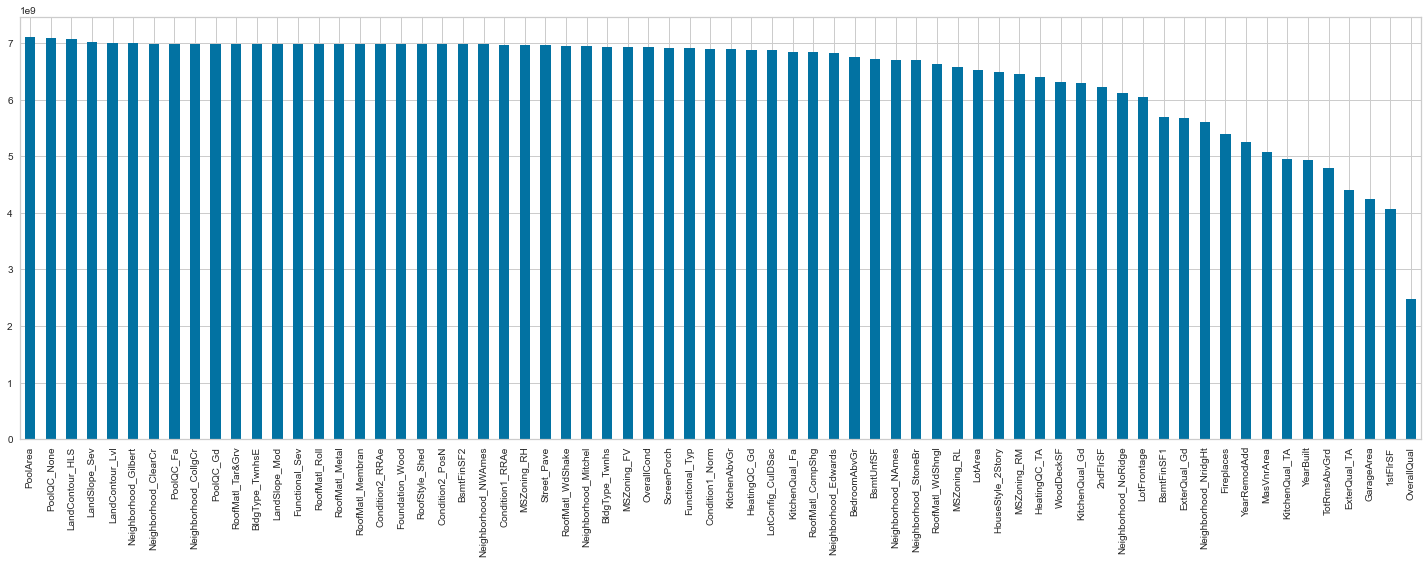

In [113]:
# now let's:

# 1) capture the mse values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the mse
# 4) and make a var plot

mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [114]:
selected_features = mse_values[mse_values < np.mean(mse_values)].index

selected_features

Index(['LotFrontage', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtFinSF1', 'HeatingQC_TA',
       '1stFlrSF', '2ndFlrSF', 'KitchenQual_Gd', 'KitchenQual_TA',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF'],
      dtype='object')

In [115]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1022, 19), (438, 19))

# Model

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [117]:
#train
print( reg.score(X_train, Y_train)*100, (1 - (1-reg.score(X_train, Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))*100)

79.92426410806172 79.5435864813683


In [118]:
#test
print(reg.score(X_test, Y_test)*100, (1 - (1-reg.score(X_test, Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))*100)

84.5529386729033 83.85079952167163


<AxesSubplot:xlabel='SalePrice'>

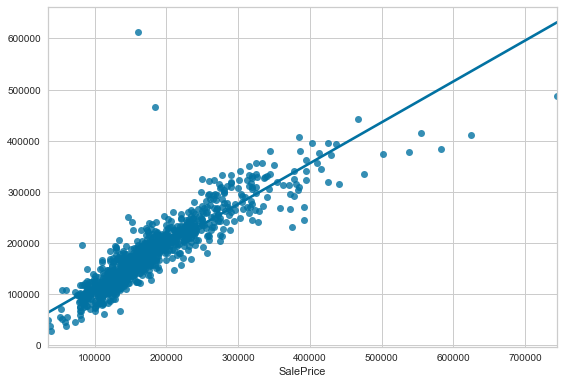

In [119]:
#plot on train dataset
import seaborn as sns
Y_pred = reg.predict(X_train)  # make predictions
sns.regplot(x=Y_train, y=Y_pred, ci=None, color="b")

<AxesSubplot:xlabel='SalePrice'>

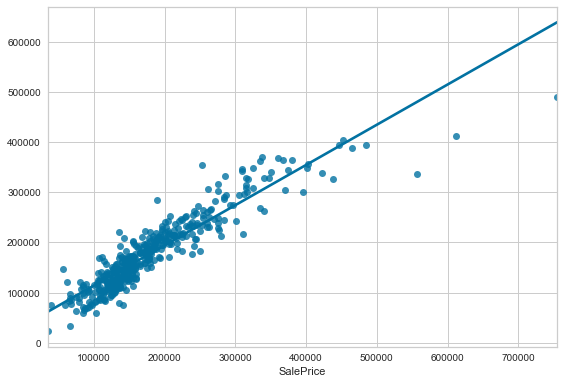

In [120]:
#plot on test dataset
Y_pred = reg.predict(X_test)  # make predictions
sns.regplot(x=Y_test, y=Y_pred, ci=None, color="b")

# Final Prediction

In [121]:
#Creating Dummies
X=pd.get_dummies(test)

#Normalizaion
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
col=X.columns
X = pd.DataFrame(x_scaled)
X.columns=col

# select features in the dataframes
X = X[selected_features]
X.shape

(1447, 19)

In [122]:
#predicting value
Y_pred = reg.predict(X)
Y_pred

array([107346.21345672, 139872.33573467, 160915.94649138, ...,
       160076.50448156,  93006.25789644, 221757.89067125])

In [123]:
test['SalePrice_predicted']= Y_pred
sample=test[['Id','SalePrice_predicted']]
sample.to_csv("solution.csv")

In [124]:
sample

,Id,SalePrice_predicted
0,1461,107346.213457
1,1462,139872.335735
2,1463,160915.946491
3,1464,181580.902952
4,1465,185431.667274
...,...,...
1454,2915,56616.744980
1455,2916,76049.008699
1456,2917,160076.504482
1457,2918,93006.257896
